# Bootstrapping

Use bootstrapping to calculate statistics, confidence intervals and to do hypothesis testing.

In [1]:
import numpy as np
import scipy as sci
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

## Empirical cumulative distribution

Compare ECDF of the original sample and the ECDF's of 50 bootstrapped samples.

In [2]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

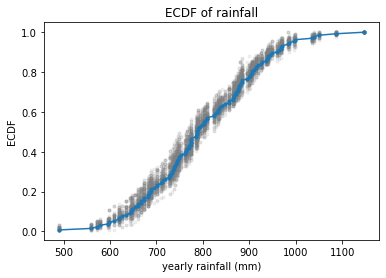

In [3]:
# Plot 50 bootstrapped ECDF's
for i in range(50):
    rng = np.random.default_rng(0+i)
    bs = np.random.choice(rainfall, size=len(rainfall))
    ecdf = ECDF(bs)
    x = np.sort(bs)
    y = ecdf(x)
    plt.plot(x, y, marker='.', linestyle='none',
             color='gray', alpha=0.1)

# Plot original sample's ECDF               
ecdf = ECDF(rainfall) # np.arange(1, len(rainfall)+1) / len(rainfall)
x = np.sort(rainfall)
y = ecdf(x)

plt.plot(x, y, marker='.')
plt.title('ECDF of rainfall')
plt.xlabel('yearly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

## Sample mean

Compare the sample mean and confidence intervals from bootstrapped samples with the ones calculated analytically.

In [4]:
def bootstrap_replicate_1d(data, func, seed):
    """Generate bootstrap replicate of 1D data."""
    rng = np.random.default_rng(seed)
    bs_sample = rng.choice(data, len(data))
    return func(bs_sample)

In [5]:
def draw_bs_reps(data, func, size=1, seed=0):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func, seed+i)
    return bs_replicates

First, analytically.

Mean of original sample: 800.09
Standard Error of Mean for original sample: 10.51
The confidence interval of the orginal sample mean: [779.49, 820.69]


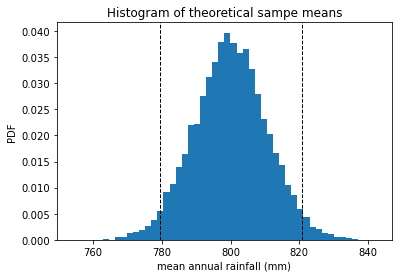

In [6]:
sem = sci.stats.sem(rainfall, ddof=0) # np.std(rainfall)/np.sqrt(len(rainfall))
cl, cu = sci.stats.norm.interval(alpha=0.95, loc=np.mean(rainfall), scale=sem) # (np.mean(rainfall)-1.96*sem, np.mean(rainfall)+1.96*sem)
print(f"Mean of original sample: {np.mean(rainfall):.2f}")
print(f"Standard Error of Mean for original sample: {sem:.2f}")
print(f"The confidence interval of the orginal sample mean: [{cl:.2f}, {cu:.2f}]")

rng = np.random.default_rng(42)
samples_normal = rng.normal(loc=np.mean(rainfall), scale=sem, size=10_000) 

plt.hist(samples_normal, bins=50, density=True)
plt.axvline(cl, color='k', linestyle='dashed', linewidth=1)
plt.axvline(cu, color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of theoretical sampe means')
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')
plt.show()


Now, wih bootstrapping.

Mean of bootstrapped means: 800.17
Standard Deviation of bootstrapped means: 10.45
The confidence interval of the orginal sample mean: [779.47, 820.59]


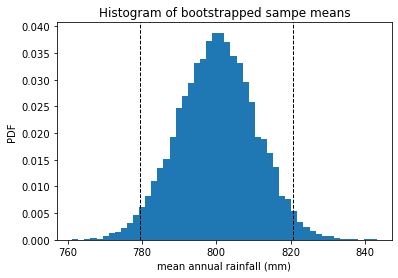

In [7]:
bs_replicates = draw_bs_reps(rainfall, np.mean, 10_000)
bs_mean = np.mean(bs_replicates)
bs_std = np.std(bs_replicates)
bs_cl, bs_cu = np.percentile(bs_replicates, [2.5, 97.5])
print(f"Mean of bootstrapped means: {bs_mean:.2f}")
print(f"Standard Deviation of bootstrapped means: {bs_std:.2f}")
print(f"The confidence interval of the orginal sample mean: [{bs_cl:.2f}, {bs_cu:.2f}]")
plt.hist(bs_replicates, bins=50, density=True)
plt.axvline(bs_cl, color='k', linestyle='dashed', linewidth=1)
plt.axvline(bs_cu, color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of bootstrapped sampe means')
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')
plt.show()

## Regression coefficients

Bootstrapping can also be used to etimate confidence intervals of model parameters.

In [8]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

Estimate one regression model on the original data.

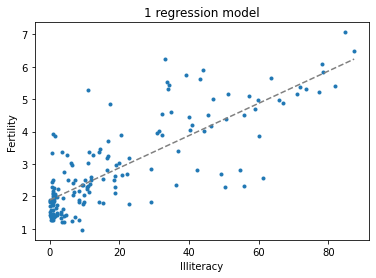

In [9]:
slope, intercept = np.polyfit(illiteracy, fertility, deg=1)
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.plot([0, np.max(illiteracy)], [intercept, intercept+slope*np.max(illiteracy)], 
         linestyle='dashed', color='gray')
plt.title('1 regression model')
plt.xlabel('Illiteracy')
plt.ylabel('Fertility')
plt.show()

Estimate 10,000 bootstrapped models.

In [10]:
def draw_bs_pairs_linreg(x, y, size=1, seed=0):
    """Perform pairs bootstrap for linear regression."""
    inds = np.arange(0, len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    for i in range(size):
        rng = np.random.default_rng(seed+i)
        bs_inds = rng.choice(inds, size=len(x))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)
    return bs_slope_reps, bs_intercept_reps

In [11]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 10_000)
bs_slope_cl, bs_slope_cu = np.percentile(bs_slope_reps, [2.5, 97.5])
bs_intercept_cl, bs_intercept_cu = np.percentile(bs_intercept_reps, [2.5, 97.5])
print(f"Mean of bootstrapped slopes: {np.mean(bs_slope_reps):.2f}")
print(f"Confidence intervals of slopes: [{bs_slope_cl:.2f}, {bs_slope_cu:.2f}]")
print(f"Mean of bootstrapped intercepts: {np.mean(bs_intercept_reps):.2f}")
print(f"Confidence intervals of intercepts: [{bs_intercept_cl:.2f}, {bs_intercept_cu:.2f}]")

Mean of bootstrapped slopes: 0.05
Confidence intervals of slopes: [0.04, 0.06]
Mean of bootstrapped intercepts: 1.89
Confidence intervals of intercepts: [1.76, 2.03]


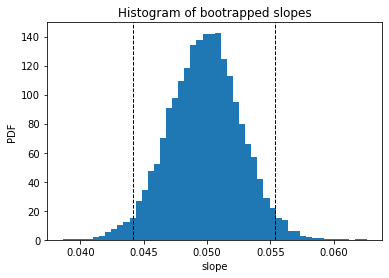

In [12]:
plt.hist(bs_slope_reps, bins=50, density=True)
plt.axvline(bs_slope_cl, color='k', linestyle='dashed', linewidth=1)
plt.axvline(bs_slope_cu, color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of bootrapped slopes')
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

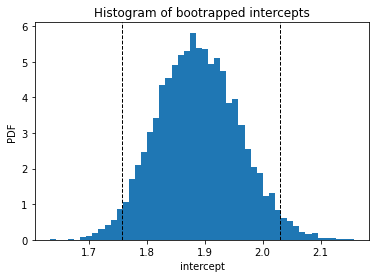

In [13]:
plt.hist(bs_intercept_reps, bins=50, density=True)
plt.axvline(bs_intercept_cl, color='k', linestyle='dashed', linewidth=1)
plt.axvline(bs_intercept_cu, color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of bootrapped intercepts')
plt.xlabel('intercept')
plt.ylabel('PDF')
plt.show()

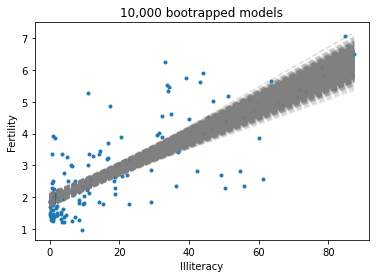

In [14]:
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
for i, s in zip(bs_intercept_reps, bs_slope_reps):
    plt.plot([0, np.max(illiteracy)], [i, i+s*np.max(illiteracy)], 
            linestyle='dashed', color='gray', alpha=0.1)
plt.title('10,000 bootrapped models')
plt.xlabel('Illiteracy')
plt.ylabel('Fertility')
plt.show()

## Hypothesis testing

Simulate a distribution of a test statistic under the null hypothesis. Compare it with the observed test statistic.

P-value is the probability of observing a value at least as extreme as the observed value under the null hypothesis.

The lower the p-value the lower the risk of making a type I error (rejecting null hypothesis when it's true).

In [15]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])
rain_jun_nov = np.concatenate((rain_june, rain_november), axis=0)

Below the observed sample means.

In [16]:
print(f"Rain J mean: {np.mean(rain_june):.2f}")
print(f"Rain N mean: {np.mean(rain_november):.2f}")
print(f"Sample J&N mean: {np.mean(rain_jun_nov):.2f}")

Rain J mean: 58.16
Rain N mean: 79.27
Sample J&N mean: 68.72


Test if the two means are different.

The null hypothesis is that the difference between the two means is 0 (the means are the same.)

Generate two samples where that's true.

In [17]:
rain_j_shifted = rain_june - np.mean(rain_june) + np.mean(rain_jun_nov) # mean-center and add new mean
rain_n_shifted = rain_november - np.mean(rain_november) + np.mean(rain_jun_nov) # mean-center and add new mean
print(f"Sample J under H0 mean: {np.mean(rain_j_shifted):.2f}")
print(f"Sample N under H0 mean: {np.mean(rain_n_shifted):.2f}")

Sample J under H0 mean: 68.72
Sample N under H0 mean: 68.72


In [18]:
def plot_hypothesis_testing(x, xlabel, title, stat_lo=None, stat_hi=None):
    """
    Plot histogram of distribution of test statistic under null hypothesis
    and highlight p-value of one-tail and two-tail tests.
    """
    _, bin_edges = np.histogram(x, bins=50, density=True)
    
    if stat_lo is not None:
        assert stat_lo < np.mean(x), "Lo test statistic not lower than mean"
        lo_bin = 0 if np.all(bin_edges >= stat_lo) else np.argmin(bin_edges < stat_lo) - 1
        bin_edges[lo_bin] = stat_lo

    if stat_hi is not None:
        assert stat_hi > np.mean(x), "Hi test statistic not higher than mean"
        hi_bin = 50 if np.all(bin_edges < stat_hi) else np.argmax(bin_edges >= stat_hi)
        bin_edges[hi_bin] = stat_hi
    
    _, _, patches = plt.hist(x, bins=bin_edges, density=True)

    if stat_lo is not None:
        for i in range(0, lo_bin):
            patches[i].set_facecolor('r')
        plt.axvline(stat_lo, color='k', linestyle='dashed', linewidth=1)

    if stat_hi is not None: 
        for i in range(hi_bin, 50):
            patches[i].set_facecolor('r')
        plt.axvline(stat_hi, color='k', linestyle='dashed', linewidth=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('PDF')
    plt.show()

Use bootstrapping to simulate the distribution of the sample mean differences under the null hypothesis and see where the observed mean difference lies on that distribution.

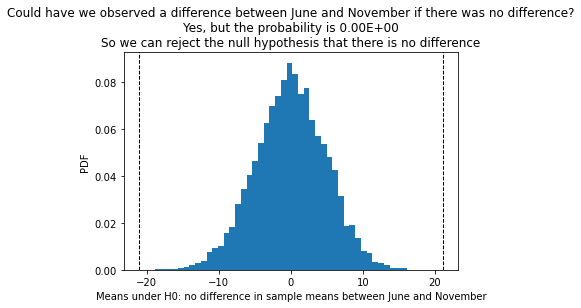

In [19]:
bs_null_means_j = draw_bs_reps(rain_j_shifted, np.mean, 10_000)
bs_null_means_n = draw_bs_reps(rain_n_shifted, np.mean, 10_000)
bs_null_means_diff = bs_null_means_n - bs_null_means_j
obs_means_diff = np.mean(rain_november) - np.mean(rain_june)

plot_hypothesis_testing(bs_null_means_diff, 
                        xlabel="Means under H0: no difference in sample means between June and November",
                        title=f"Could have we observed a difference between June and November if there was no difference?\n" + \
                              f"Yes, but the probability is {2*np.mean(bs_null_means_diff >= abs(obs_means_diff)):.2E}\n" + \
                               "So we can reject the null hypothesis that there is no difference",
                        stat_hi=obs_means_diff,
                        stat_lo=-obs_means_diff)

Another example.

In [20]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])
force_a_b = np.concatenate((force_a, force_b), axis=0)
cat = ["A" for _ in range(len(force_a))] + ["B" for _ in range(len(force_b))]

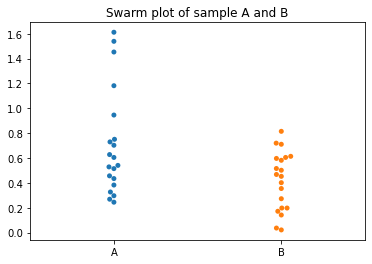

In [21]:
sns.swarmplot(x=cat, y=force_a_b)
plt.title('Swarm plot of sample A and B')
plt.show()

In [22]:
print(f"The observed sample mean of B is {np.mean(force_b):.2f}")

The observed sample mean of B is 0.42


Could the real mean be 0.55?

In [23]:
mean_bias = 0.55 - np.mean(force_b)
sample_with_055_mean = force_b + mean_bias
print(f"Sample under H0 mean: {np.mean(sample_with_055_mean):.2f}")

Sample under H0 mean: 0.55


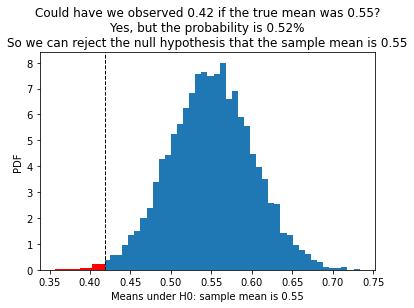

In [24]:
bs_null_means = draw_bs_reps(sample_with_055_mean, np.mean, 10_000)

plot_hypothesis_testing(bs_null_means, 
                        xlabel="Means under H0: sample mean is 0.55",
                        title=f"Could have we observed {np.mean(force_b):.2f} if the true mean was 0.55?\n" + \
                              f"Yes, but the probability is {np.mean(bs_null_means <= np.mean(force_b)):.2%}\n" + \
                               "So we can reject the null hypothesis that the sample mean is 0.55",
                        stat_lo=np.mean(force_b))

Same data, different test.

In [25]:
print(f"Sample A mean: {np.mean(force_a):.2f}")
print(f"Sample B mean: {np.mean(force_b):.2f}")
print(f"Sample A&B mean: {np.mean(force_a_b):.2f}")

Sample A mean: 0.71
Sample B mean: 0.42
Sample A&B mean: 0.56


In [26]:
force_a_shifted = force_a - np.mean(force_a) + np.mean(force_a_b) # mean-center and add new mean
force_b_shifted = force_b - np.mean(force_b) + np.mean(force_a_b) # mean-center and add new mean
print(f"Sample A under H0 mean: {np.mean(force_a_shifted):.2f}")
print(f"Sample B under H0 mean: {np.mean(force_b_shifted):.2f}")

Sample A under H0 mean: 0.56
Sample B under H0 mean: 0.56


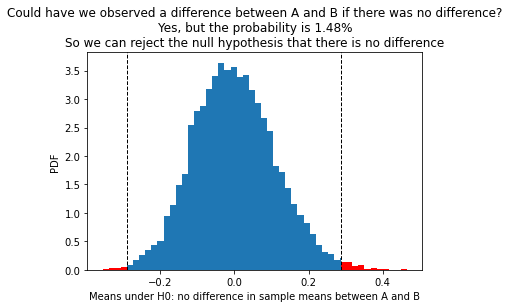

In [27]:
bs_null_means_a = draw_bs_reps(force_a_shifted, np.mean, 10_000)
bs_null_means_b = draw_bs_reps(force_b_shifted, np.mean, 10_000)
bs_null_means_diff = bs_null_means_a - bs_null_means_b
obs_means_diff = np.mean(force_a) - np.mean(force_b)

plot_hypothesis_testing(bs_null_means_diff, 
                        xlabel="Means under H0: no difference in sample means between A and B",
                        title=f"Could have we observed a difference between A and B if there was no difference?\n" + \
                              f"Yes, but the probability is {2*np.mean(bs_null_means_diff >= abs(obs_means_diff)):.2%}\n" + \
                               "So we can reject the null hypothesis that there is no difference",
                        stat_hi=obs_means_diff,
                        stat_lo=-obs_means_diff)

Last example. Re-use the illiteracy/fertility data to do hypothesis testing on Pearson's correlation coefficient.

Text(0, 0.5, 'Fertility')

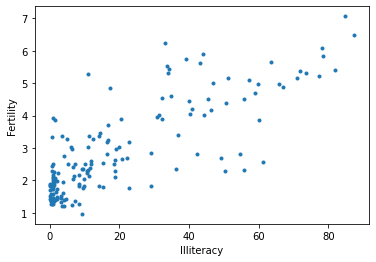

In [28]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.xlabel('Illiteracy')
plt.ylabel('Fertility')

In [29]:
print(f"Correlation: {np.corrcoef(fertility, illiteracy)[0,1]:.3f}")

Correlation: 0.804


To create distribution under the null hypothesis of no correlation, shuffle one variable while keeping the other the same.

In [30]:
print('5 uncorrelated bootstrap replicates:')
for i in range(5):
    rng = np.random.default_rng(0+i)
    print(f"{np.corrcoef(rng.permutation(fertility), illiteracy)[0,1]:.3f}")

5 uncorrelated bootstrap replicates:
-0.044
0.043
-0.057
0.035
0.008


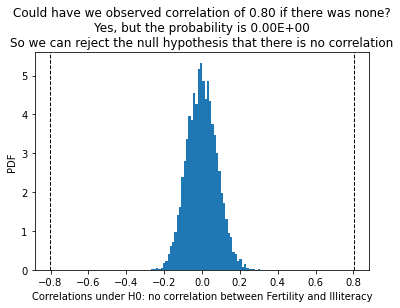

In [31]:
bs_null_corrs = np.empty(10_000)
for i in range(10_000):
    rng = np.random.default_rng(0+i)
    bs_null_corrs[i] = np.corrcoef(rng.permutation(fertility), illiteracy)[0,1]

obs_corr = np.corrcoef(fertility, illiteracy)[0,1]

plot_hypothesis_testing(bs_null_corrs, 
                        xlabel="Correlations under H0: no correlation between Fertility and Illiteracy",
                        title=f"Could have we observed correlation of 0.80 if there was none?\n" + \
                              f"Yes, but the probability is {2*np.mean(bs_null_corrs >= abs(obs_corr)):.2E}\n" + \
                               "So we can reject the null hypothesis that there is no correlation",
                        stat_hi=obs_corr,
                        stat_lo=-obs_corr)